<h2>Assignment 1 - Part 1: Linear Regression on Boston Housing Data</h2>

You're asked to do the following tasks to predict boston house price:
<lu>
<li>Use scikit-learn</li>
<li>Implement analytical solution (normal equation) to obtain weights</li>
<li>Implement numerical solution (gradient descent) to obtain weights</li>
</lu>
    Note: the accuracy of your implementations should be close to that of a linear model from scikit-learn

In addition, you need to show the resulting intercept and coefficents, calculate errors on training dataset and testing dataset, and plot a figure to show your predictions and real prices on the testing dataset. 

In [1]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

In [2]:
# Load data from scikit-learn, which returns (data, target)
# note: if you call "boston = load_boston()", it returns a dictionary-like object
data, target = datasets.load_boston(True)

# Split the data into two parts: training data and testing data
train_data,test_data,train_target,test_target = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=42)

<h4>Use scikit-learn library in the following cell</h4>

Intercept: [30.28894834]
Coefficients: [[-1.12463481e-01  3.00810168e-02  4.07309919e-02  2.78676719e+00
  -1.72406347e+01  4.43248784e+00 -6.23998173e-03 -1.44848504e+00
   2.62113793e-01 -1.06390978e-02 -9.16398679e-01  1.24516469e-02
  -5.09349120e-01]]
Errors Training Data: 10.820787048327796
Errors Test Data: 12.15571346484679


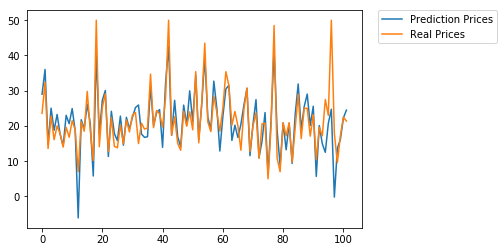

In [3]:
# Function to get linear model
def lin_model_generator(data, coefficients):
    return np.matmul(coefficients.T, data)

# Function to get loss function error
def loss_function(data_values, target_values, coefficients):
    n_len = len(data_values) # get the number of features
    xw_matrix = np.matmul(data_values, coefficients) # matrix multiplication: data (X) * weights (w)
    temp_subtract = target_values - xw_matrix
    return ((1/(2 * n_len)) * (np.matmul(temp_subtract.T, temp_subtract))).item(0) # following the formula provided in lecture

# Task 1-1: use linear regression in sklearn
lin_reg_train = linear_model.LinearRegression()
lin_reg_train.fit(train_data, train_target)

# Task 1-2: show intercept and coefficents
intercept_train_1 = lin_reg_train.intercept_
coefficients_train_1 = lin_reg_train.coef_

print("Intercept: ", end="")
print(intercept_train_1)
print("Coefficients: ", end="")
print(coefficients_train_1)

# Task 1-3: show errors on training dataset and testing dataset
# Add intercept to the data and list of 1's to coefficients
train_data_appended = np.insert(train_data, 0, 1, axis=1) # insert list of 1s into the train data matrix
test_data_appended = np.insert(test_data, 0, 1, axis=1) # insert list of 1s into the test data matrix
coefficients_appended = np.insert(coefficients_train_1, 0, intercept_train_1, axis=1).T # insert coefficient into the coefficients matrix

print("Errors Training Data: ", end="")
print(loss_function(train_data_appended, train_target, coefficients_appended))
print("Errors Test Data: ", end="")
print(loss_function(test_data_appended, test_target, coefficients_appended))

# Task 1-4: show plot a figure to show your predictions and real prices on the testing dataset
prediction_prices_14 = lin_model_generator(test_data_appended.T, coefficients_appended).T
index_14 = np.matrix(np.arange(prediction_prices_14.shape[0]))

plt.plot(index_14.T, prediction_prices_14, label="Prediction Prices")
plt.plot(test_target, label="Real Prices")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

<h4>Use analytical solution (normal equation) to perform linear regression in the following cell</h4>

Intercept: [22.79653465]
Coefficients: [[-0.996232    0.69558769  0.28047684  0.71933958 -2.02678678  3.14074199
  -0.17447147 -3.08322662  2.24869616 -1.76573775 -2.03984933  1.13874218
  -3.61718128]]
Errors Training Data: 10.820787048327793
Errors Test Data: 12.15571346484667


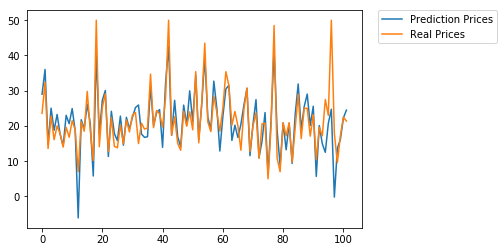

In [6]:
# Task 2-1: Implement a function solving normal equation 
# Inputs: Training data and training label
# Output: Weights
def myNormalEqualFun(X,y):
    weight = np.matmul(X.T, X)
    weight = linalg.fractional_matrix_power(weight, -1)
    weight = np.matmul(weight, np.matmul(X.T,y))
    return weight
    
# Task 2-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return np.matmul(w.T, X)

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myNormalEqual to train the model and get weights
w = myNormalEqualFun(train_data_intercept,train_target)

# Task 2-3: show intercept and coefficents
intercept = w[0]
coefficients = w[1:]
print("Intercept: ", end="")
print(intercept)
print("Coefficients: ", end="")
print(coefficients.T)

# Task 2-4: show errors on training dataset and testing dataset
print("Errors Training Data: ", end="")
print(loss_function(train_data_intercept, train_target, w))
print("Errors Test Data: ", end="")
print(loss_function(test_data_intercept, test_target, w))

# Task 2-5: show plot a figure to show your predictions and real prices on the testing dataset
predict_prices_25 = myPredictFun(test_data_intercept.T, w).T
index_25 = np.matrix(np.arange(predict_prices_25.shape[0]))

plt.plot(index_25.T, predict_prices_25, label="Prediction Prices")
plt.plot(test_target, label="Real Prices")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

<h4>Use numerical solution (gradient descent) to perform linear regression in the following cell</h4>

Intercept: [[22.79653465]]
Coefficients: [[-0.99623199  0.69558766  0.28047679  0.71933959 -2.02678678  3.14074201
  -0.17447148 -3.08322662  2.248696   -1.76573757 -2.03984932  1.13874218
  -3.61718127]]
Errors Training Data: 10.820787048327794
Errors Test Data: 12.155713510445638


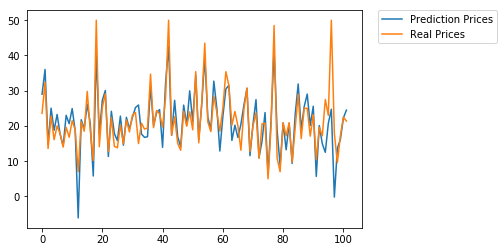

In [5]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

import random

# Task 3-1: Implement a function performing gradient descent
# Inputs: Training data, training label, leaerning rate, number of iterations
# Output: Weights
def myGradientDescentFun(X,y,learning_rate,numItrs):
    num_elem = X.shape[0]
    num_features = X.shape[1]
    w = []
    # Generate random intercept that ranges from 20 to 30
    w.append(random.uniform(20,30))
    # Generate random coefficients
    for i in range(0, num_features - 1):
        w.append(random.uniform(-1,1))
        
    w = np.matrix(w).T
    
    for i in range(0, numItrs):  
        temp_w = y - np.matmul(X,w)
        temp_w = np.matmul(X.T, temp_w)
        temp_w = learning_rate * (1/num_elem) * temp_w
        w += temp_w

    return w

# Task 3-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return np.matmul(w.T, X)

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
lrn_rate = 0.25
numIters = 1024
w = myGradientDescentFun(train_data_intercept,train_target,lrn_rate,numIters)

# Task 3-3: show intercept and coefficents
intercept = w[0]
coefficients = w[1:]
print("Intercept: ", end="")
print(intercept)
print("Coefficients: ", end="")
print(coefficients.T)

# Task 3-4: show errors on training dataset and testing dataset
print("Errors Training Data: ", end="")
print(loss_function(train_data_intercept, train_target, w))
print("Errors Test Data: ", end="")
print(loss_function(test_data_intercept, test_target, w))

# Task 3-5: show plot a figure to show your predictions and real prices on the testing dataset
predict_prices_35 = myPredictFun(test_data_intercept.T, w).T
index_35 = np.matrix(np.arange(predict_prices_35.shape[0]))

plt.plot(index_35.T, predict_prices_35, label="Prediction Prices")
plt.plot(test_target, label="Real Prices")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()